#### HW1 Solution Part 1 ####



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
# Reading in the data
data = pd.read_csv('house_prices.csv')
data.head(),data.shape

(   Size        Price
 0  1360  1169.012279
 1  1794  1927.392846
 2  1630  1630.883233
 3  1595  1557.012280
 4  2138  2528.605411,
 (100, 2))

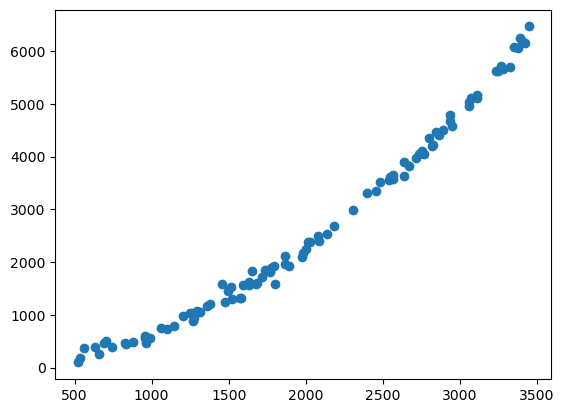

In [3]:
# Visualizing the data

plt.scatter(data['Size'],data['Price'])
plt.show()

In [4]:
# Import the sklearn modules

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [5]:
# Separating the data and splitting it into training and test data

X = data['Size']
y = data['Price']
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)
print(X.shape,y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

(100, 1) (100, 1)


In [6]:
# Build the model and predict on test values

linreg = LinearRegression()

linreg.fit(X_train,y_train)

train_pred = linreg.predict(X_train)
test_pred = linreg.predict(X_test)

In [7]:
# Check and compare the metrics

print(f"RMSE train: {mean_squared_error(y_train,train_pred)**0.5}")
print(f"RMSE test: {mean_squared_error(y_test,test_pred)**0.5}")

print(f"MAE train: {mean_absolute_error(y_train,train_pred)}")
print(f"MAE test: {mean_absolute_error(y_test,test_pred)}")


RMSE train: 335.57064212056986
RMSE test: 275.65210109503744
MAE train: 276.0764699966475
MAE test: 212.3019264300166


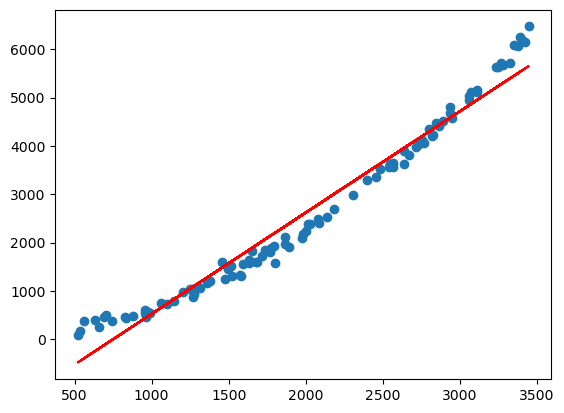

In [8]:
# Regression line

plt.scatter(X,y)
plt.plot(X,linreg.predict(X),c='r')
plt.show()

In [9]:
# Feature engineering to build a more fitting model
# As the scatter plot suggests, the relationship between Size and Price is quadratic

new_data = data.copy()  # Create a new copy of the original data (This is good practice and we avoid making changes to the original data)

X_new = new_data.drop('Price',axis=1) # Separate the X value

# Add polynomial term: degree 2 
X_new['poly1'] = X_new['Size']**2
 
print(X_new.head()) # Check if the term has been added to the features

# Split the data
X_new_train,X_new_test,y_train,y_test = train_test_split(X_new,y,test_size=0.15,random_state=42)


   Size    poly1
0  1360  1849600
1  1794  3218436
2  1630  2656900
3  1595  2544025
4  2138  4571044


In [10]:
# Build new model and predicting

linreg2 = LinearRegression()

linreg2.fit(X_new_train,y_train)

train_new_pred = linreg2.predict(X_new_train)
test_new_pred = linreg2.predict(X_new_test)
print(X_new_train.shape,train_new_pred.shape)

(85, 2) (85, 1)


In [11]:
# Check the new metrics to see if there is an improvement

print(f"RMSE train: {mean_squared_error(y_train,train_new_pred)**0.5}")
print(f"RMSE test: {mean_squared_error(y_test,test_new_pred)**0.5}")


print(f"MAE train: {mean_absolute_error(y_train,train_new_pred)}")
print(f"MAE test: {mean_absolute_error(y_test,test_new_pred)}")

RMSE train: 94.99004396947893
RMSE test: 91.66119179477995
MAE train: 74.03639402352468
MAE test: 78.39875981537392


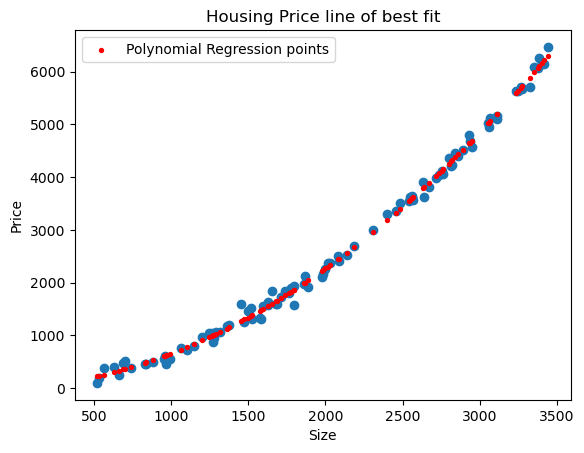

In [12]:
# New Regression line

plt.scatter(X_new['Size'],y)
plt.scatter(X_new['Size'],linreg2.predict(X_new),label = 'Polynomial Regression points',c='r',s=8)
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.title('Housing Price line of best fit')
plt.show()

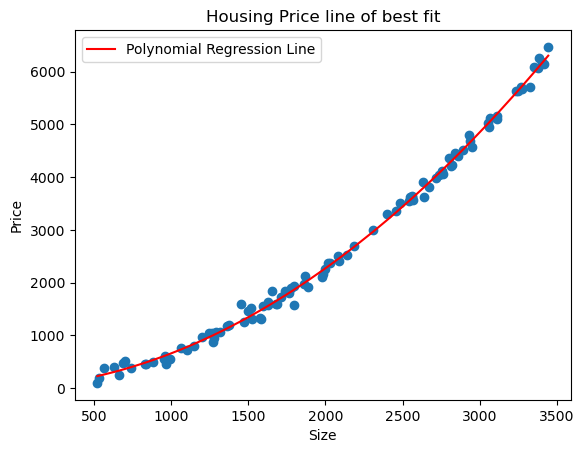

In [13]:
# If you want to see it as a line you need to sort the data in ascending order

sorted_indices = np.argsort(np.array(X_new['Size']))  # Get the indices of the data in ascending order of the feature 'Size'
X_sorted = np.array(X_new['Size'])[sorted_indices]  # Sort the data in ascending order for the feature size
predictions = linreg2.predict(X_new)[sorted_indices]  # Predict the values of the prices and sort it in the ascending ordder using the same indices

# Plot the line of regression
plt.scatter(X_new['Size'],y)
plt.plot(X_sorted,predictions,label = 'Polynomial Regression Line',c='r')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.title('Housing Price line of best fit')
plt.show()

